## Load Dataset About Bank Marketing System Taken From Kaggle

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [132]:
data=pd.read_csv('bank.csv')
print(data.head())
print(data.info())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

## SUMMARY STATISTICS

In [133]:

print("Average Age,Balance and Duration :\n",data[['age','duration','balance']].mean())
print("Minimum Age :",data.age.min())
print("Maximum Age :",data.age.max())
print("Minimum Balance",data.balance.min())
print("Maximum Balance",data.balance.max())
print("Statistical Analysis of pdays\n",data.pdays.describe())

Average Age,Balance and Duration :
 age           41.231948
duration     371.993818
balance     1528.538524
dtype: float64
Minimum Age : 18
Maximum Age : 95
Minimum Balance -6847
Maximum Balance 81204
Statistical Analysis of pdays
 count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64


In [134]:
print(data['job'].value_counts())
print("Frequently Occuring Value :",data['job'].mode())

print(data['education'].value_counts())
print("Frequently Occuring Value :",data['education'].mode())
print(data[['marital','housing']].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
Frequently Occuring Value : 0    management
Name: job, dtype: object
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
Frequently Occuring Value : 0    secondary
Name: education, dtype: object
marital   housing
married   no         3246
          yes        3105
single    no         1967
          yes        1551
divorced  no          668
          yes         625
Name: count, dtype: int64


In [135]:
print(data[['marital','housing']].value_counts())
print(data[['marital','housing']].mode())

marital   housing
married   no         3246
          yes        3105
single    no         1967
          yes        1551
divorced  no          668
          yes         625
Name: count, dtype: int64
   marital housing
0  married      no


## Data Types and Unique Values count

In [136]:
col_names=['age','education','default','balance','housing','loan', 'contact','day', 'month','duration','campaign','pdays','previous','poutcome','deposit']
for col in col_names:
    print(data[col].value_counts()) 
data.dtypes 

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
88      2
93      2
95      1
89      1
Name: count, Length: 76, dtype: int64
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 8585      1
-159       1
-132       1
 4576      1
 6691      1
Name: count, Length: 3805, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31  

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

## Visualizations and Feature Distribution Analysis

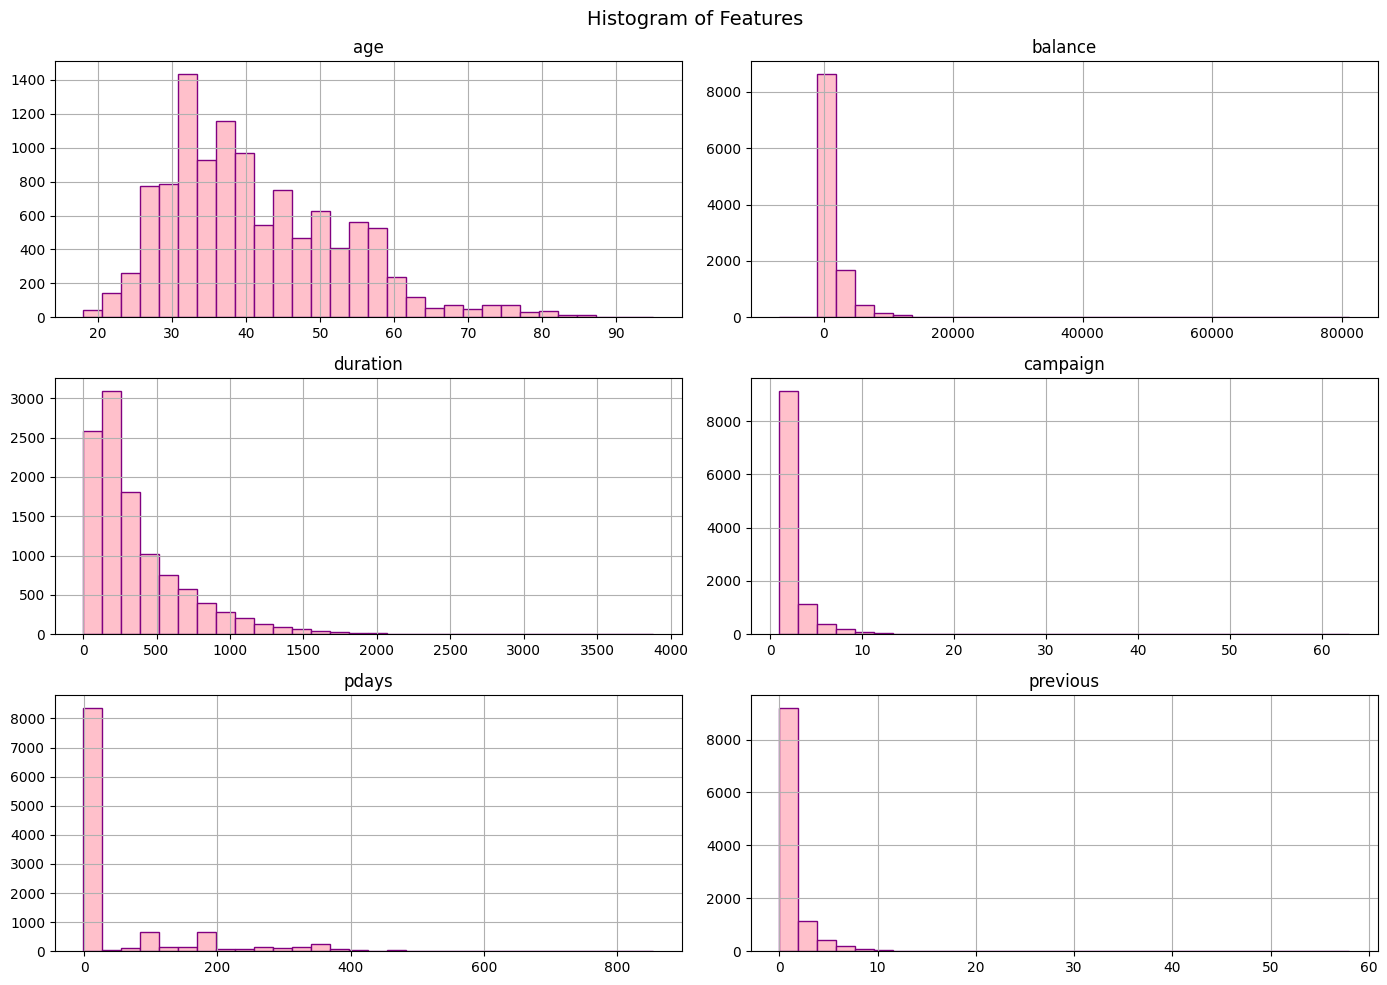

In [137]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[num_cols].hist(figsize=(14, 10), bins=30, color='pink', edgecolor='purple')
mp.suptitle('Histogram of Features', fontsize=14)
mp.tight_layout()
mp.show()

<Axes: xlabel='deposit', ylabel='duration'>

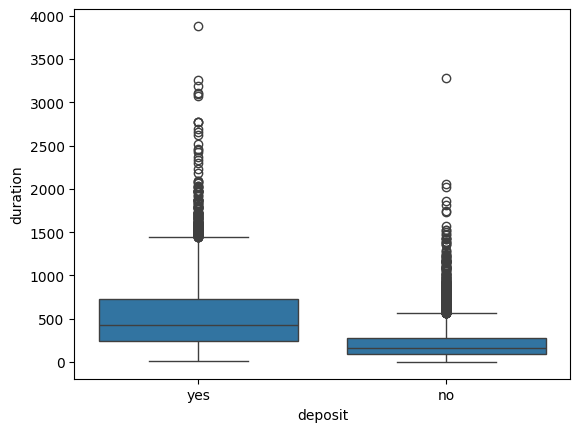

In [138]:
sns.boxplot(x='deposit', y='duration', data=data)

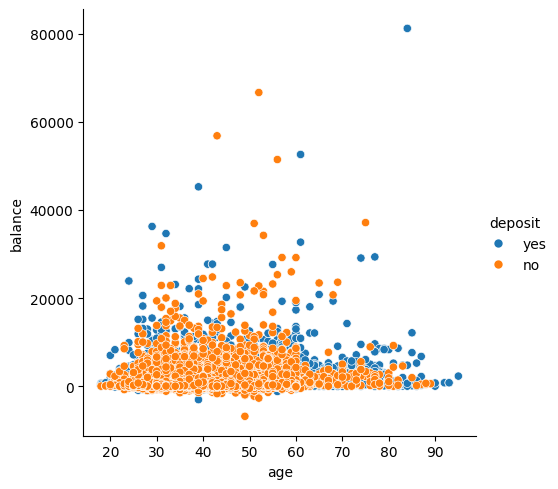

In [139]:
sns.relplot(x='age', y='balance', hue='deposit', data=data)

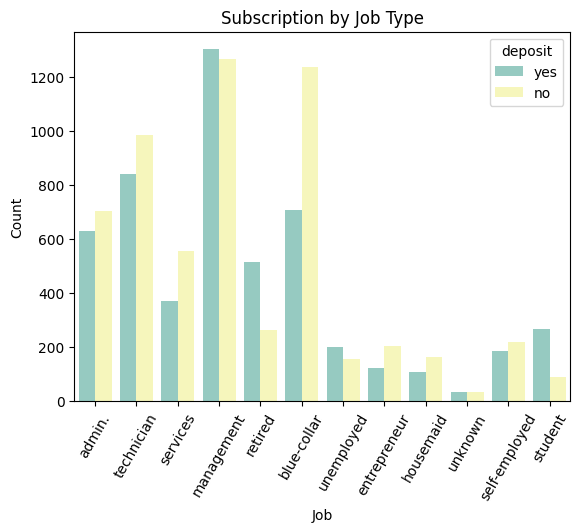

<Axes: xlabel='housing', ylabel='count'>

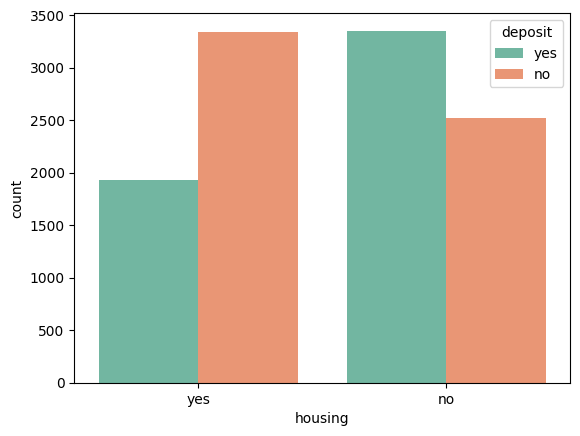

In [140]:
mp.figure()
sns.countplot(x='job', hue='deposit', data=data,palette="Set3")
mp.title('Subscription by Job Type')
mp.xlabel('Job')
mp.ylabel('Count')
mp.xticks(rotation=60)
mp.show()
sns.countplot(x='housing',hue='deposit',data=data,palette='Set2')

Text(0.5, 1.0, 'Duration vs Campaign')

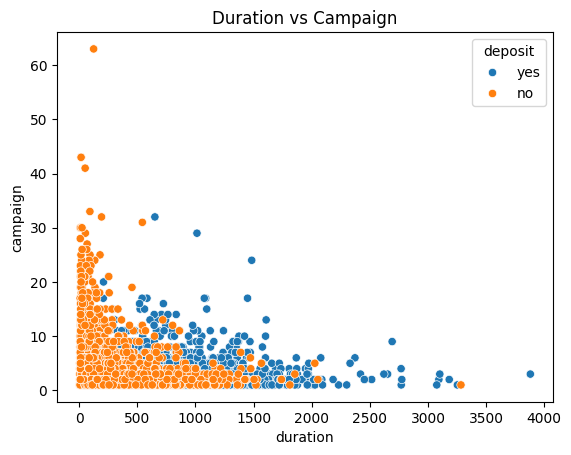

In [141]:
sns.scatterplot(x='duration', y='campaign', hue='deposit', data=data)
mp.title('Duration vs Campaign')

## Correlation Analysis

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


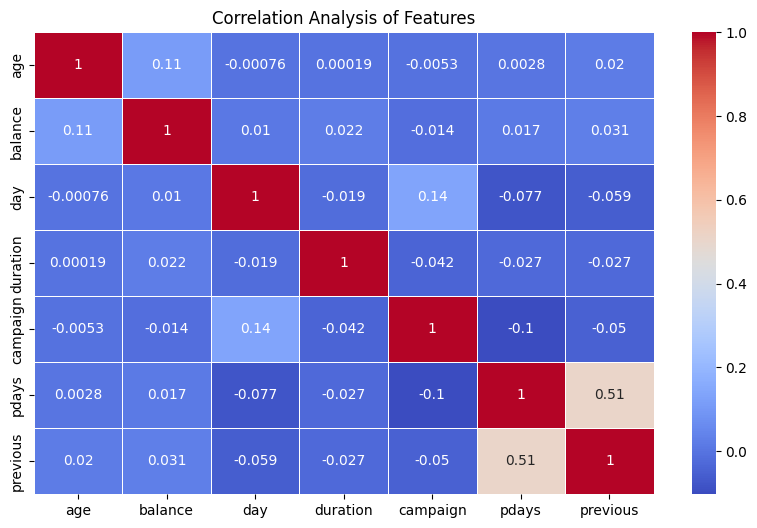

In [142]:
correlation = data.corr(numeric_only=True)
print(correlation)
mp.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
mp.title('Correlation Analysis of Features')
mp.show()

## Missing Value Analysis

In [143]:
data.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Outlier Detection

In [144]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns # for selecting only numerical columns
outlier_summary = []

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    outlier_summary.append([col, outliers])

outliers_count= pd.DataFrame(outlier_summary, columns=['Column', 'Outlier Count'])
print(outliers_count)


     Column  Outlier Count
0       age            171
1   balance           1055
2       day              0
3  duration            636
4  campaign            601
5     pdays           2750
6  previous           1258


## Pairwise feature relationships

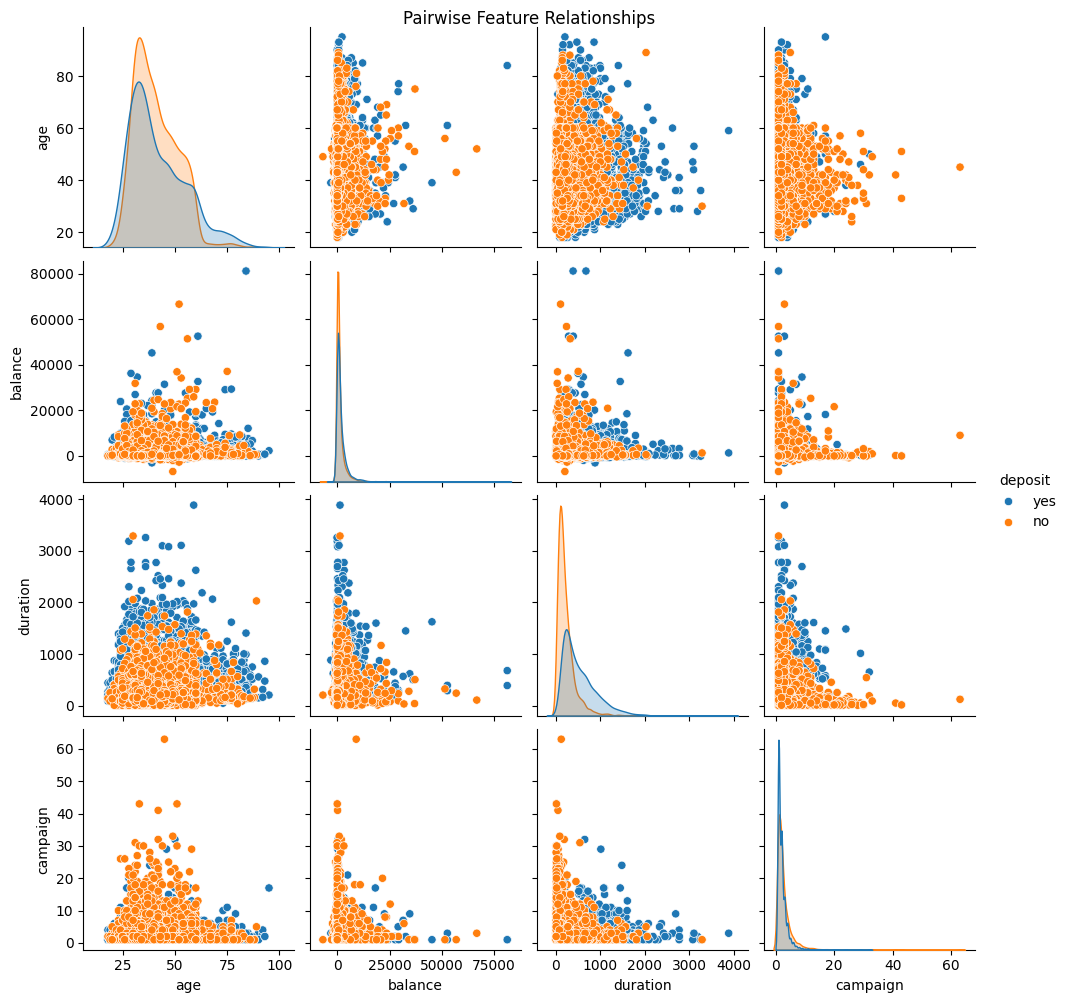

In [145]:
sns.pairplot(data, vars=['age', 'balance', 'duration', 'campaign'], hue='deposit')
mp.suptitle("Pairwise Feature Relationships",y=1)
mp.show()

## Group Analysis

In [146]:
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})
print(data.groupby('marital')['deposit'].mean())
print(data.groupby('duration')['deposit'])

marital
divorced    0.481052
married     0.433790
single      0.543491
Name: deposit, dtype: float64


In [147]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [148]:
data['job'] = data['job'].replace('unknown', 'other')

## Encoding Binary and Multi-values Columns

In [149]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
data['deposit'] = label_encoder_y.fit_transform(data['deposit'])

In [150]:
X=data.drop(['deposit','duration'],axis=1) 
Y=data['deposit']
print(X)
# Drop column duration because by this the model is only predicting deposit by changing duration.It has a high impact leading to 
# wrong predictions

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  campaign  pdays  previous poutcome  
0       un

In [151]:

from sklearn.preprocessing import LabelEncoder

cols = ['default', 'housing', 'loan']
label_encoders = {}

for col in cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  
    label_encoders[col] = le 

In [152]:
import category_encoders as ce
multi_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
ordinal_encoder = ce.OrdinalEncoder(cols=multi_cols)
X = ordinal_encoder.fit_transform(X)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
3955,28,12,2,2,0,5741,0,0,2,10,12,5,200,3,3
11150,34,4,1,1,0,355,0,0,2,21,4,3,-1,0,1
5173,48,7,3,1,0,201,0,0,2,10,6,1,91,1,4
3017,53,8,1,2,0,1961,0,0,2,15,7,1,-1,0,1
2910,53,4,1,2,0,1624,0,0,2,11,6,3,97,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,4,1,2,0,761,1,0,2,11,3,2,-1,0,1
5191,28,11,2,2,0,159,0,0,2,16,6,2,33,4,4
5390,35,2,1,1,0,1144,0,0,2,20,4,13,-1,0,1
860,51,5,1,2,0,746,0,0,2,25,4,5,-1,0,1


In [154]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


### Logistic regression

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6784594715629199
Confusion Matrix:
 [[858 308]
 [410 657]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      1166
           1       0.68      0.62      0.65      1067

    accuracy                           0.68      2233
   macro avg       0.68      0.68      0.68      2233
weighted avg       0.68      0.68      0.68      2233



### Save the Model

In [157]:
import joblib
joblib.dump(model, 'lg_model.pkl')
joblib.dump(label_encoders, 'binary_label_encoders.pkl')
joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')
joblib.dump(label_encoder_y, 'label_encoder_y.pkl')
joblib.dump(scaler,'scaler_model.pkl')
joblib.dump(list(X_train.columns),'model_cols.pkl')

['model_cols.pkl']